# 분류(Classification)의 개요

# 결정 트리

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 56)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=56)

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, \
    feature_names = iris_data.feature_names, impurity = True, filled = True)

In [4]:
!pip install graphviz

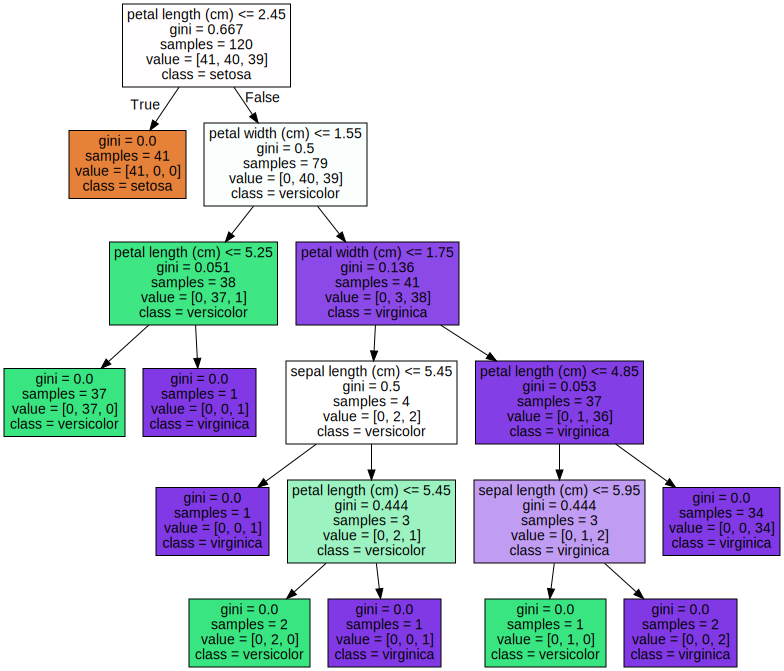

In [5]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

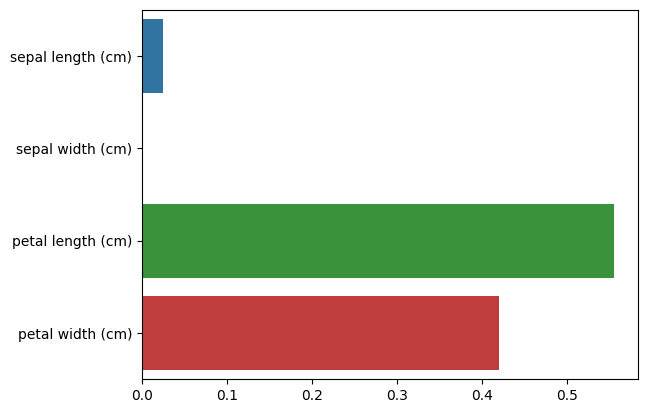

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)



## 결정 트리 과적합(Overfitting)

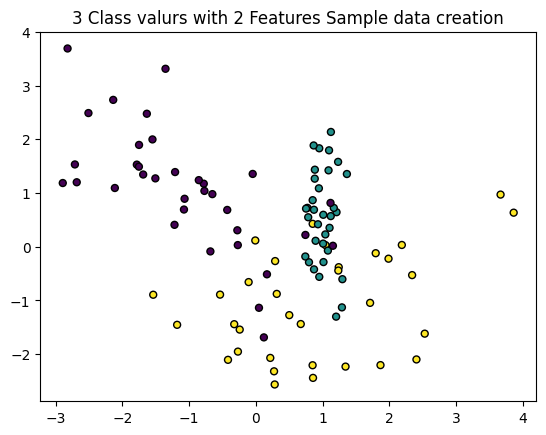

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class valurs with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 우형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 그래프 혈태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c=y_labels, s = 25, edgecolor = 'k')

In [8]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

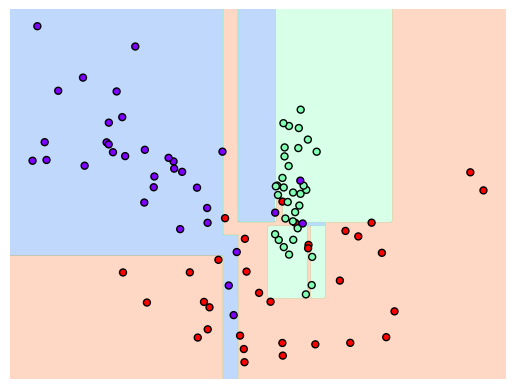

In [9]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

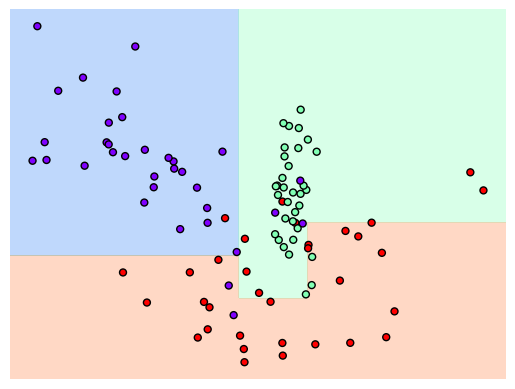

In [10]:
# min_samples_leaf = 6 으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
from io import IncrementalNewlineDecoder
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human-activity/features.txt', sep = '\s+',
                              header = None. names = ['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출.

# 앙상블 학습

# 랜덤 포레스트

# GBM(Gradient Boosting Machine)

# XGBoost(eXtra Gradient Boost)

# LightGBM

# 베이지안 최적화 기반의 HypetOpt를 이용한 하이퍼 파라미터 튜닝

# 분류 실습 - 캐글 산탄데르 고객 만족 예측

# 분류 실습 - 캐글 신용카드 사기 검출

# 스태킹 앙상블

# 정리